In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

### KBF kernel

In [2]:
from sklearn.gaussian_process.kernels import RBF

In [3]:
x1 = np.array([[2,2,2,4]])
x2 = np.array([[4,5,6,7]])

In [4]:
k = RBF()
k(x1,x2)

array([[5.60279644e-09]])

In [5]:
def kernel(x1,x2):
    return np.exp((-1/2)*(np.sqrt((sum((x1-x2)**2))))**2)

In [6]:
np.dot(np.ravel(x1),np.ravel(x2))

58

In [7]:
kernel(x1,x2)

array([0.13533528, 0.011109  , 0.00033546, 0.011109  ])

In [149]:
X_train = np.random.normal(size=(50,4))
y_train = (np.random.random(X_train.shape)>0.5)*1

X_train.shape, y_train.shape

((50, 4), (50, 4))

In [150]:
clf1 = OneClassSVM(kernel='rbf', nu=0.12, gamma="scale")
clf1.fit(X_train)
np.mean(clf1.predict(X_train)==1)

0.78

In [151]:
X_test_p = np.random.normal(size=(100,4))
y_test = clf1.predict(X_test_p)
X_test = X_test_p[y_test==1]

X_out = X_test_p[y_test==-1]

In [152]:
from sklearn.decomposition import PCA
import matplotlib

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_out_pca = pca.transform(X_out)

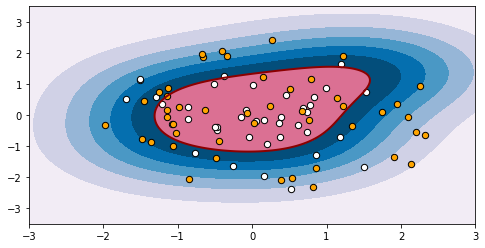

In [153]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 300), np.linspace(-3.5, 3.5, 300))
Z = clf1.decision_function(np.c_[xx.ravel(), xx.ravel(),yy.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,4))
a = plt.contour(xx, yy, Z, levels=0, linewidths=2, colors='darkred')

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_in[:, 0], X_in[:, 1], c='white', s=s, edgecolors='k')
b1 = plt.scatter(X_out[:, 0], X_out[:, 1], c='orange', s=s, edgecolors='k')